In [ ]:
'''following tasks has to be done.
1. remove leading and training spaces from the column names
2. Clean the file and remove % symbol from any column if it exists
3. find the missing values in each column and drop all the rows having missing values
4. check the dependent variable customer_segment and encode it properly
5. find the correlation among columns and drop all except one having highest correlation
6. remove $ symbol from data if present in any column
7. use logistic regression model and find accuracy'''

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split

In [40]:
df=pd.read_csv("C:/Users/user/Downloads/wine.csv")
df.head()

,Alcohol,Malic acid,Ash,Alcalinity,Magnesium,phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline,customer_segment
0,14.23,1.710000,2.43,15.6,$127.00,2.80,3.06,28%,2.29,5.64,1.04,3.92,1065,One
1,13.20,1.780000,2.14,11.2,$100.00,2.65,2.76,26%,1.28,4.38,1.05,3.92,1050,one
2,13.16,2.382826,2.67,18.6,$101.00,2.80,3.24,30%,2.81,5.68,1.03,3.92,1185,One
3,14.37,1.950000,2.50,16.8,$113.00,3.85,3.49,24%,2.18,7.80,0.86,3.92,1480,one
4,13.24,2.590000,2.87,21.0,$118.00,2.80,2.69,39%,1.82,4.32,1.04,3.92,735,One


In [41]:
df.shape

(178, 14)

In [42]:
#1. remove leading and training spaces from the column names
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
print (df)

     Alcohol  Malic acid   Ash  Alcalinity Magnesium  phenols  \
0      14.23    1.710000  2.43        15.6   $127.00     2.80   
1      13.20    1.780000  2.14        11.2   $100.00     2.65   
2      13.16    2.382826  2.67        18.6   $101.00     2.80   
3      14.37    1.950000  2.50        16.8   $113.00     3.85   
4      13.24    2.590000  2.87        21.0   $118.00     2.80   
..       ...         ...   ...         ...       ...      ...   
173    13.71    5.650000  2.45        20.5    $95.00     1.68   
174    13.40    3.910000  2.48        23.0   $102.00     1.80   
175    13.27    4.280000  2.26        20.0   $120.00     1.59   
176    13.17    2.590000  2.37        20.0   $120.00     1.65   
177    14.13    4.100000  2.74        24.5    $96.00     2.05   

                             Flavanoids Nonflavanoid_phenols               \
0                                  3.06                               28%   
1                                  2.76                          

In [43]:
df.head(10)

,Alcohol,Malic acid,Ash,Alcalinity,Magnesium,phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline,customer_segment
0,14.23,1.710000,2.43,15.6,$127.00,2.80,3.06,28%,2.29,5.64,1.04,3.92,1065,One
1,13.20,1.780000,2.14,11.2,$100.00,2.65,2.76,26%,1.28,4.38,1.05,3.92,1050,one
2,13.16,2.382826,2.67,18.6,$101.00,2.80,3.24,30%,2.81,5.68,1.03,3.92,1185,One
3,14.37,1.950000,2.50,16.8,$113.00,3.85,3.49,24%,2.18,7.80,0.86,3.92,1480,one
4,13.24,2.590000,2.87,21.0,$118.00,2.80,2.69,39%,1.82,4.32,1.04,3.92,735,One
5,14.20,1.760000,2.45,15.2,$112.00,3.27,3.39,34%,1.97,6.75,1.05,3.92,1450,one
6,14.39,1.870000,2.45,14.6,$96.00,2.50,2.52,30%,1.98,5.25,1.02,3.92,1290,One
7,14.06,2.891919,2.61,17.6,$121.00,2.60,2.51,31%,1.25,5.05,1.06,3.92,1295,one
8,14.83,1.640000,2.17,NaN,$97.00,2.80,2.98,29%,1.98,5.20,1.08,3.92,1045,One
9,13.86,1.350000,2.27,16.0,$98.00,2.98,3.15,22%,1.85,7.22,1.01,3.92,1045,one


In [44]:
#2. Clean the file and remove % symbol from any column if it exists
df=df.replace('[$]','')
df

,Alcohol,Malic acid,Ash,Alcalinity,Magnesium,phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline,customer_segment
0,14.23,1.710000,2.43,15.6,$127.00,2.80,3.06,28%,2.29,5.64,1.04,3.92,1065,One
1,13.20,1.780000,2.14,11.2,$100.00,2.65,2.76,26%,1.28,4.38,1.05,3.92,1050,one
2,13.16,2.382826,2.67,18.6,$101.00,2.80,3.24,30%,2.81,5.68,1.03,3.92,1185,One
3,14.37,1.950000,2.50,16.8,$113.00,3.85,3.49,24%,2.18,7.80,0.86,3.92,1480,one
4,13.24,2.590000,2.87,21.0,$118.00,2.80,2.69,39%,1.82,4.32,1.04,3.92,735,One
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.650000,2.45,20.5,$95.00,1.68,0.61,52%,1.06,7.70,0.64,3.92,740,THREE
174,13.40,3.910000,2.48,23.0,$102.00,1.80,0.75,43%,1.41,7.30,0.70,3.92,750,THREE
175,13.27,4.280000,2.26,20.0,$120.00,1.59,0.69,43%,1.35,10.20,0.59,3.92,835,THREE
176,13.17,2.590000,2.37,20.0,$120.00,1.65,0.68,53%,1.46,9.30,0.60,3.92,840,THREE


In [45]:
#3. find the missing values in each column and drop all the rows having missing values
df.isnull().sum()

Alcohol                                              0
Malic acid                                           0
Ash                                                  0
Alcalinity                                           1
Magnesium                                            0
phenols                                              2
                        Flavanoids                   0
Nonflavanoid_phenols                                 0
Proanthocyanins                                      1
Color_intensity                                      0
Hue                                                  0
OD280                                                0
Proline                                              0
customer_segment                                     0
dtype: int64

In [46]:
df.dropna(axis=0,inplace=True)
df

,Alcohol,Malic acid,Ash,Alcalinity,Magnesium,phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline,customer_segment
0,14.23,1.710000,2.43,15.6,$127.00,2.80,3.06,28%,2.29,5.64,1.04,3.92,1065,One
1,13.20,1.780000,2.14,11.2,$100.00,2.65,2.76,26%,1.28,4.38,1.05,3.92,1050,one
2,13.16,2.382826,2.67,18.6,$101.00,2.80,3.24,30%,2.81,5.68,1.03,3.92,1185,One
3,14.37,1.950000,2.50,16.8,$113.00,3.85,3.49,24%,2.18,7.80,0.86,3.92,1480,one
4,13.24,2.590000,2.87,21.0,$118.00,2.80,2.69,39%,1.82,4.32,1.04,3.92,735,One
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.650000,2.45,20.5,$95.00,1.68,0.61,52%,1.06,7.70,0.64,3.92,740,THREE
174,13.40,3.910000,2.48,23.0,$102.00,1.80,0.75,43%,1.41,7.30,0.70,3.92,750,THREE
175,13.27,4.280000,2.26,20.0,$120.00,1.59,0.69,43%,1.35,10.20,0.59,3.92,835,THREE
176,13.17,2.590000,2.37,20.0,$120.00,1.65,0.68,53%,1.46,9.30,0.60,3.92,840,THREE


In [47]:
df.isnull().sum()

Alcohol                                              0
Malic acid                                           0
Ash                                                  0
Alcalinity                                           0
Magnesium                                            0
phenols                                              0
                        Flavanoids                   0
Nonflavanoid_phenols                                 0
Proanthocyanins                                      0
Color_intensity                                      0
Hue                                                  0
OD280                                                0
Proline                                              0
customer_segment                                     0
dtype: int64

In [48]:
df.shape

(174, 14)

In [50]:
#4. check the dependent variable customer_segment and encode it properly
df['customer_segment']=df['customer_segment'].str.isupper()
df

KeyError: 'customer_segment'

In [31]:
#5. find the correlation among columns and drop all except one having highest correlation
corr=df.corr()
corr

,Alcohol,Malic acid,Ash,Alcalinity,phenols,Flavanoids,Proanthocyanins,Color_intensity,Hue,OD280,Proline
Alcohol,1.000000e+00,1.244071e-01,2.202338e-01,-2.748355e-01,2.607213e-01,1.950142e-01,9.000167e-02,5.607033e-01,-1.152743e-01,9.963641e-15,6.266478e-01
Malic acid,1.244071e-01,1.000000e+00,1.691590e-01,2.803557e-01,-3.279866e-01,-4.052377e-01,-2.158089e-01,2.517784e-01,-5.584914e-01,-7.002682e-17,-1.780481e-01
Ash,2.202338e-01,1.691590e-01,1.000000e+00,4.505053e-01,1.294654e-01,1.146446e-01,8.611972e-03,2.577727e-01,-7.631598e-02,-1.556860e-15,2.266287e-01
Alcalinity,-2.748355e-01,2.803557e-01,4.505053e-01,1.000000e+00,-3.047535e-01,-3.313672e-01,-1.659124e-01,2.239002e-02,-2.574513e-01,1.990592e-16,-4.337156e-01
phenols,2.607213e-01,-3.279866e-01,1.294654e-01,-3.047535e-01,1.000000e+00,8.612424e-01,6.018189e-01,-6.140921e-02,4.212104e-01,-1.753479e-18,4.831038e-01
Flavanoids,1.950142e-01,-4.052377e-01,1.146446e-01,-3.313672e-01,8.612424e-01,1.000000e+00,6.396629e-01,-1.832273e-01,5.314850e-01,2.686240e-16,4.720673e-01
Proanthocyanins,9.000167e-02,-2.158089e-01,8.611972e-03,-1.659124e-01,6.018189e-01,6.396629e-01,1.000000e+00,-3.230708e-02,2.745252e-01,-1.369480e-15,3.013429e-01
Color_intensity,5.607033e-01,2.517784e-01,2.577727e-01,2.239002e-02,-6.140921e-02,-1.832273e-01,-3.230708e-02,1.000000e+00,-5.331270e-01,-3.546484e-16,3.164743e-01
Hue,-1.152743e-01,-5.584914e-01,-7.631598e-02,-2.574513e-01,4.212104e-01,5.314850e-01,2.745252e-01,-5.331270e-01,1.000000e+00,1.418488e-15,2.102773e-01
OD280,9.963641e-15,-7.002682e-17,-1.556860e-15,1.990592e-16,-1.753479e-18,2.686240e-16,-1.369480e-15,-3.546484e-16,1.418488e-15,1.000000e+00,-1.576743e-15


NameError: name 'plt' is not defined

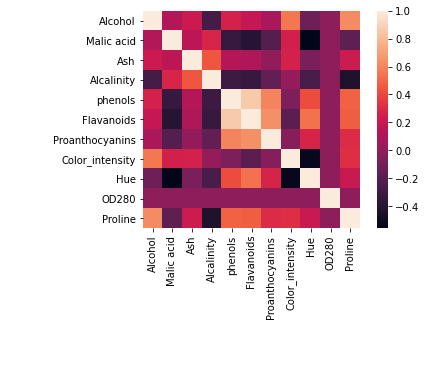

In [32]:
sns.heatmap(corr, cbar=True, square=True)
plt.show()

In [25]:
#6. remove $ symbol from data if present in any column
df

,Alcohol,Malic acid,Ash,Alcalinity,Magnesium,phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline,customer_segment
0,14.23,1.710000,2.43,15.6,127.00,2.80,3.06,28%,2.29,5.64,1.04,3.92,1065,One
1,13.20,1.780000,2.14,11.2,100.00,2.65,2.76,26%,1.28,4.38,1.05,3.92,1050,one
2,13.16,2.382826,2.67,18.6,101.00,2.80,3.24,30%,2.81,5.68,1.03,3.92,1185,One
3,14.37,1.950000,2.50,16.8,113.00,3.85,3.49,24%,2.18,7.80,0.86,3.92,1480,one
4,13.24,2.590000,2.87,21.0,118.00,2.80,2.69,39%,1.82,4.32,1.04,3.92,735,One
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.650000,2.45,20.5,95.00,1.68,0.61,52%,1.06,7.70,0.64,3.92,740,THREE
174,13.40,3.910000,2.48,23.0,102.00,1.80,0.75,43%,1.41,7.30,0.70,3.92,750,THREE
175,13.27,4.280000,2.26,20.0,120.00,1.59,0.69,43%,1.35,10.20,0.59,3.92,835,THREE
176,13.17,2.590000,2.37,20.0,120.00,1.65,0.68,53%,1.46,9.30,0.60,3.92,840,THREE


In [53]:
df=df.replace('[\%,]',')
df

SyntaxError: EOL while scanning string literal (<ipython-input-53-7d1f23596090>, line 1)

In [ ]:
#7. use logistic regression model and find accuracy
data.columns